In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import zscore

In [39]:
lung=pd.read_csv("Lung.csv")
lung.head()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [3]:
lung.size

4350

In [4]:
lung.shape

(725, 6)

In [5]:
lung.describe()

,LungCap(cc),Age( years),Height(inches)
count,725.000000,725.000000,725.000000
mean,7.863148,12.326897,64.836276
std,2.662008,4.004750,7.202144
min,0.507000,3.000000,45.300000
25%,6.150000,9.000000,59.900000
50%,8.000000,13.000000,65.400000
75%,9.800000,15.000000,70.300000
max,14.675000,19.000000,81.800000


In [6]:
lung.isnull().sum()

LungCap(cc)       0
Age( years)       0
Height(inches)    0
Smoke             0
Gender            0
Caesarean         0
dtype: int64

In [7]:
lung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
LungCap(cc)       725 non-null float64
Age( years)       725 non-null int64
Height(inches)    725 non-null float64
Smoke             725 non-null object
Gender            725 non-null object
Caesarean         725 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


In [8]:
lung.rename(columns={"Age( years)":"Age","Height(inches)":"Height","LungCap(cc)":"LungCap"}, inplace=True)
lung.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


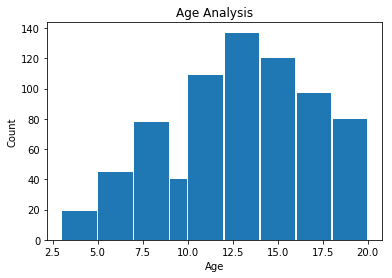

In [9]:
plt.hist(lung['Age'], bins=[3,5,7,9,10,12,14,16,18,20], rwidth=0.95)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Analysis")
plt.show()

In [10]:
lung['Gender'].value_counts()## The no Males affetcted lung is more than the female

male      367
female    358
Name: Gender, dtype: int64

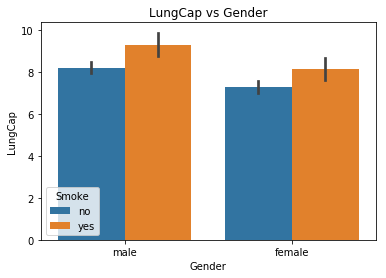

In [11]:
##The one who smokes is more affected by LungCap
sns.barplot('Gender', 'LungCap', data=lung, hue='Smoke')
plt.title("LungCap vs Gender")
plt.show()

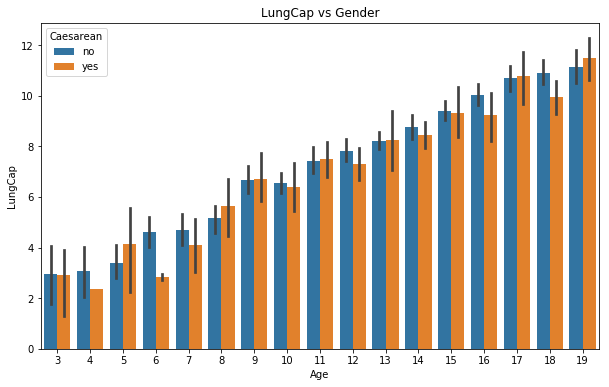

In [12]:
##The one who smokes is more affected by LungCap
plt.figure(figsize=(10,6))
sns.barplot('Age', 'LungCap', data=lung, hue='Caesarean')
plt.title("LungCap vs Gender")
plt.show()

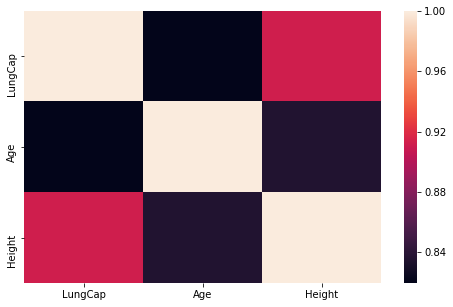

In [13]:
plt.figure(figsize=(8,5))
sns.heatmap(lung.corr())
plt.show()

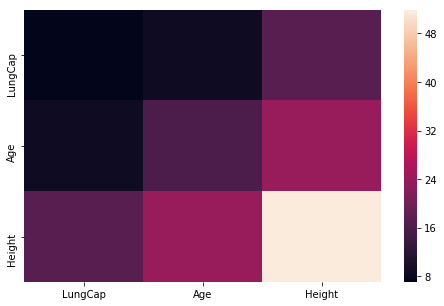

In [14]:
plt.figure(figsize=(8,5))
sns.heatmap(lung.cov())
plt.show()

In [15]:
lung['LungCap'].min()

0.507

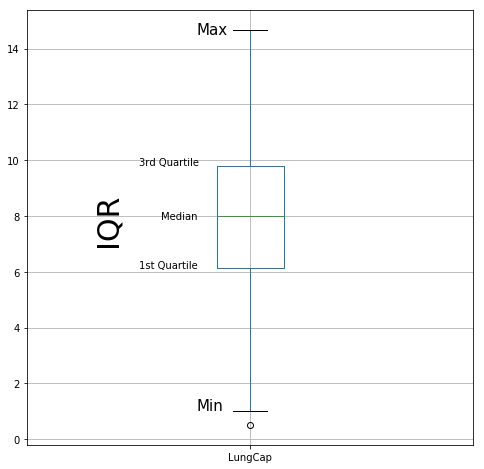

In [16]:
#sns.boxplot(lung['LungCap'])

lung.boxplot(column="LungCap",return_type='axes',figsize=(8,8))
plt.text(x=0.8, y=7.87, s="Median")
plt.text(x=0.75, y=6.14, s="1st Quartile")
plt.text(x=0.75, y=9.80, s="3rd Quartile")
plt.text(x=0.88, y=14.50, s="Max", size=15)
plt.text(x=0.88, y=1.02, s="Min", size=15)
plt.text(x=0.65, y=8.0, s="IQR",rotation=90, size=30)
plt.show()


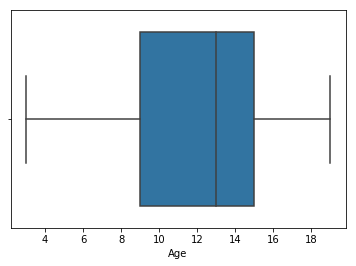

In [17]:
sns.boxplot(lung['Age'])

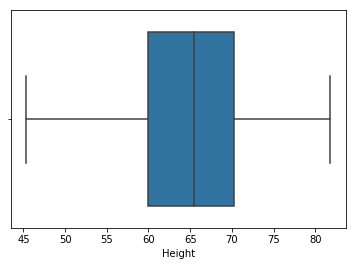

In [18]:
sns.boxplot(lung['Height'])

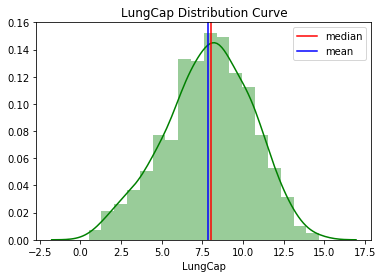

In [19]:
sns.distplot(lung['LungCap'], color='g')
plt.axvline(lung['LungCap'].median(), color='r', label='median')
plt.axvline(lung['LungCap'].mean(), color='b',label='mean')
plt.title("LungCap Distribution Curve")
plt.legend()
plt.show()

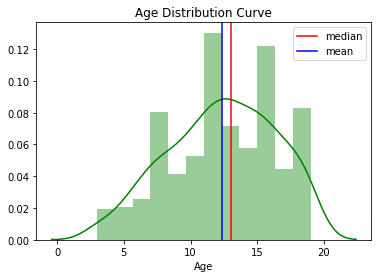

In [20]:
sns.distplot(lung['Age'], color='g')
plt.axvline(lung['Age'].median(), color='r', label='median')
plt.axvline(lung['Age'].mean(), color='b',label='mean')
plt.title("Age Distribution Curve")
plt.legend()
plt.show()

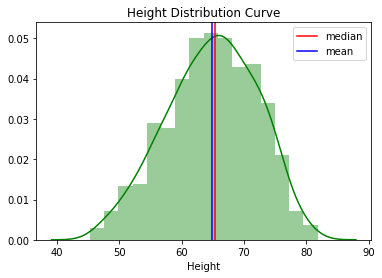

In [21]:
sns.distplot(lung['Height'], color='g')
plt.axvline(lung['Height'].median(), color='r', label='median')
plt.axvline(lung['Height'].mean(), color='b',label='mean')
plt.title("Height Distribution Curve")
plt.legend()
plt.show()

## Outlier Remove in LungCap

In [22]:
q1=lung['LungCap'].quantile(0.25)
q2=lung['LungCap'].quantile(0.50)
q3=lung['LungCap'].quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
UL=q3+1.5*iqr

In [23]:
#lung2=lung(~(lung['LungCap']<LL))
lung2= lung[~(lung['LungCap']>UL)]

In [24]:
lung['LungCap'].skew()

-0.22787342323500312

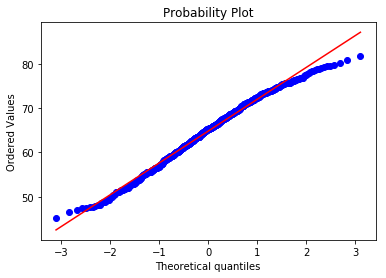

In [25]:
scipy.stats.probplot(lung['Height'], plot=plt)
plt.show()

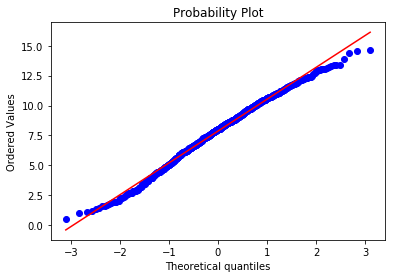

In [26]:
scipy.stats.probplot(lung['LungCap'], plot=plt)
plt.show()

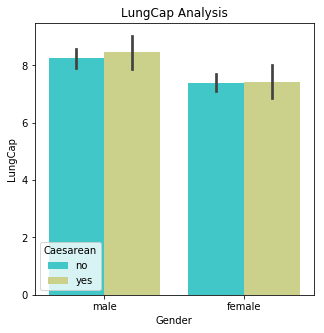

In [27]:
plt.figure(figsize=(5,5))
sns.barplot(data=lung,x='Gender',y='LungCap',hue='Caesarean', palette="rainbow")
plt.title("LungCap Analysis")
plt.show()

<Figure size 720x360 with 0 Axes>

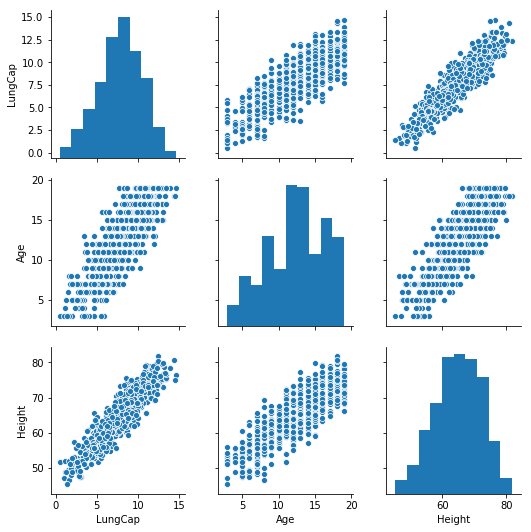

In [28]:
plt.figure(figsize=(10,5))
sns.pairplot(lung)
plt.show()

C:\Users\Goli ARAVIND\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


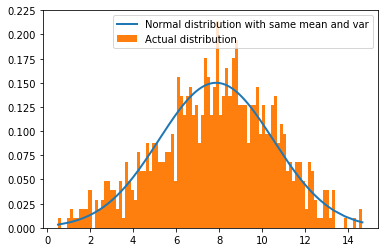

In [29]:
import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(lung['LungCap'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

C:\Users\Goli ARAVIND\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


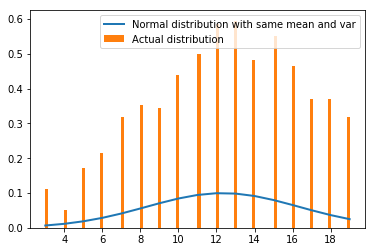

In [30]:
import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(lung['Age'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

C:\Users\Goli ARAVIND\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


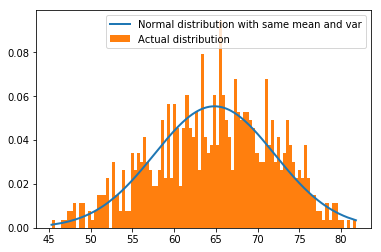

In [31]:
import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(lung['Height'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

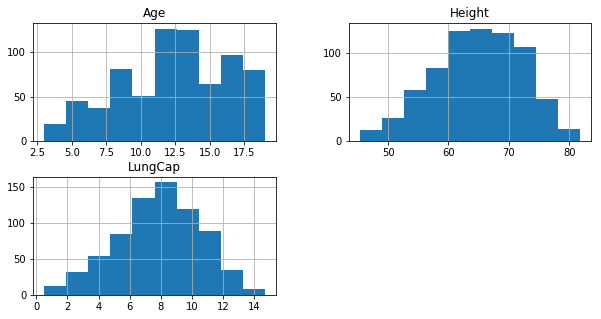

In [32]:
lung.hist(figsize=(10,5))
plt.show()

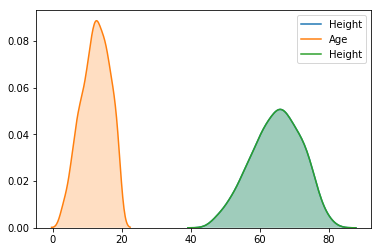

In [33]:
sns.kdeplot(lung['Height'], shade=True)
sns.kdeplot(lung['Age'],shade=True)
sns.kdeplot(lung['Height'], shade=True)
plt.show()

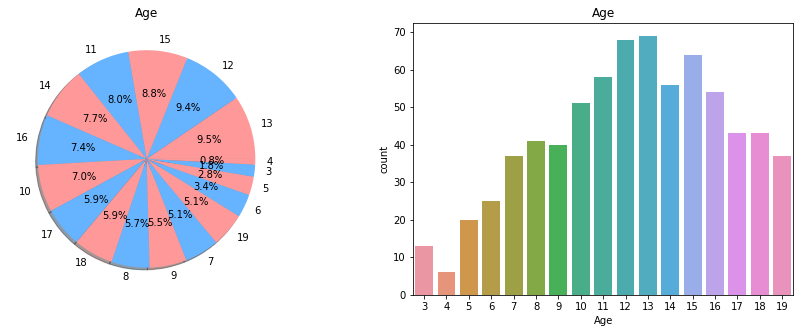

In [34]:
f,ax=plt.subplots(1,2,figsize=(15,5))
colors = ['#ff9999','#66b3ff']
lung['Age'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],colors=colors,shadow=True)
ax[0].set_title('Age')
ax[0].set_ylabel('')
sns.countplot('Age',data=lung,ax=ax[1])
ax[1].set_title('Age')
plt.show()